<a href="https://colab.research.google.com/github/mymooss/Tensorflow_practice/blob/main/1_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EC%99%80_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

**운동시간에 따른 체중감량율 알아보기**

In [ ]:
#dtype은 numpy배열의 타입을 지정해주는 매개변수임. dtype을 통해서 float32형으로 지정함
#float32 = 소수점 이하 7자리의 정밀도를 가지는 32비트 부동 소수점 숫
x = np.array([1,3,5,6,10], dtype=np.float32) 
y = np.array([0.5,1,2,1.8,3], dtype=np.float32)

모델 만들기

In [ ]:
model = keras.Sequential([ #모델 만드는 칸 하나 만들어줌
    layers.Dense(units=1, input_shape=[1], activation="linear")
])#모델 칸안에 layer를 여러개 쌓을 수 있지만 , 지금은 1개 만들어줌
#layer안에 존재하는 unit(node)
#input_shape=[1]는 레이어 안에 들어가는 값(input value)이 1개라는 뜻
#레이어를 생성함과 동시에 keras Sequential에서는 암묵적으로 x값이 있으면 b가 존재한다고 생각함.그냥 무시해도됨
#activation은 어떤 형태로 가지고 놀것인지.. 따라서 h(x)=wx+b형태로 만든다는 뜻 w는 x선의 가중치임

init_w, init_b = model.weights #임의의 값으로 초기화
print(init_w, init_b) #iniw_w는 1.00임 h(x) = -0.07x + 0 

<tf.Variable 'dense_4/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.07166839]], dtype=float32)> <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


데이터 시각

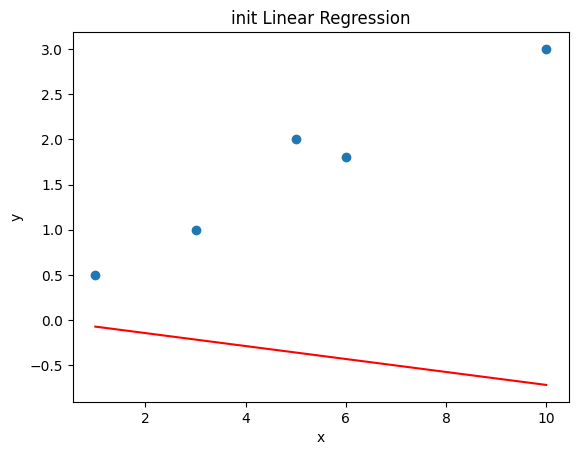

In [ ]:
plt.scatter(x, y)
plt.plot(x, init_w[0][0] * x + init_b[0], color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('init Linear Regression')
plt.show()

만약 h(x) = 2x+1을 만족하는 식을 찾고 싶다면

Epoch 1/10
5/5 [==============================] - 1s 6ms/step - loss: 0.0465
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 0.0455
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0450
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0444
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 0.0443
Epoch 6/10
5/5 [==============================] - 0s 8ms/step - loss: 0.0439
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0438
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 0.0438
Epoch 9/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0439
Epoch 10/10
5/5 [==============================] - 0s 10ms/step - loss: 0.0438



학습된 w: 0.30888810753822327, b: 0.06607712060213089





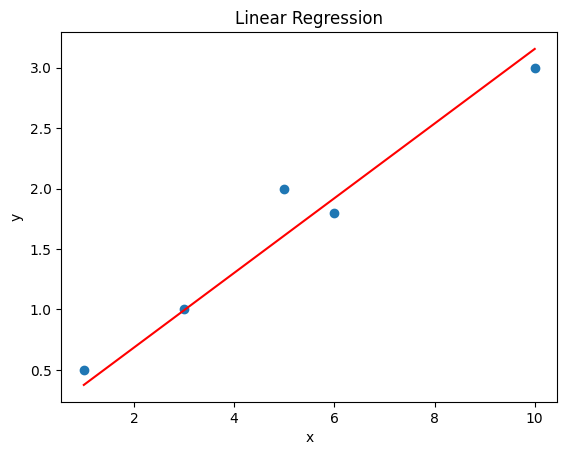

In [ ]:
#모델 컴파일 과정
sgd = keras.optimizers.SGD(learning_rate=0.001)#경사하강법 learning rate를 0.001로 설정하고
#optimizer : 최적화 , SGD는 확률적 경사 하강법을 기반으로하는 최적화 알고리즘  
#learning rate는 알파 값..
model.compile(optimizer=sgd, loss='mean_squared_error')#MSE(mean_squared_error)를 비용함수로 설정

#학습
history = model.fit(x, y, batch_size=1, epochs=10)

#학습된 w,b
w, b = model.layers[0].get_weights()[0][0][0], model.layers[0].get_weights()[1][0]

print(f"\n\n\n학습된 w: {w}, b: {b}\n\n\n")

#Plot the regression line
plt.scatter(x, y)
plt.plot(x, w* x + b, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()